In [1]:
#this magic command tells jupyter to plot matplotlib charts inline
%matplotlib inline

# the basic data science tools
import numpy as np
import pandas as pd

# pyplot contains the main plotting libraries
import matplotlib.pyplot as plt

# checking version
import matplotlib
matplotlib.__version__

'2.2.2'

A simple plot to check all is working:

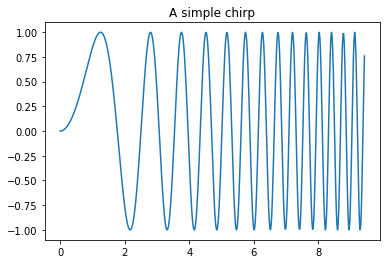

In [2]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

A scatterplot

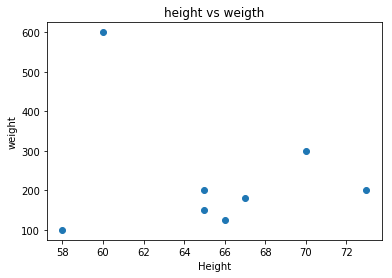

In [3]:
weight = [600,150,200,300,200,100,125,180]
height = [60,65,73,70,65,58,66,67]

plt.scatter(height, weight) 
plt.title('height vs weigth')
plt.xlabel('Height')
plt.ylabel('weight')
plt.show()

A simple line plot plotting the age vs height of a child

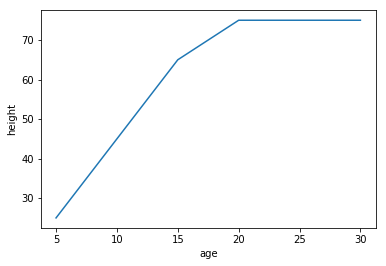

In [4]:
age = [5, 10, 15, 20, 25, 30]
height = [25, 45, 65, 75, 75, 75]
plt.plot(age, height)
plt.xlabel('age'); plt.ylabel('height')
plt.show()

## Bar charts

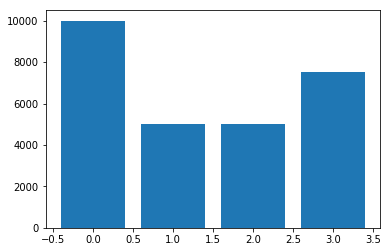

In [5]:
names = ["McDonalds", "Burger King", "Wendys", "Subway"]
patrons = [10000, 5000, 5000, 7500]
x = [0, 1, 2, 3]
plt.bar(x, patrons);

# forest fires in Montesinho National Park in Portugal
Now impporting some data to plot, in this case [forest fire data](https://archive.ics.uci.edu/ml/datasets/Forest+Fires).

- X -- The X position on the grid where the fire occurred.
- Y -- The Y position on the grid where the fire occured.
- month -- the month the fire occcurred.
- day -- the day of the week the fire occurred.
- temp -- the temperature in Celsius when the fire occurred.
- wind -- the wind speed when the fire occurred.
- rain -- the rainfall when the fire occurred.
- area -- the area the fire consumed.

In [6]:
forest_fires = pd.read_csv('data/forestfires.csv')
print(forest_fires.shape)
forest_fires.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Make a scatter plot with the wind column on the x-axis and the area column on the y-axis.

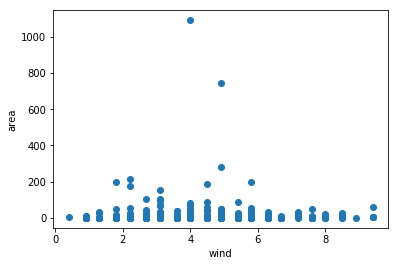

In [7]:
plt.scatter(forest_fires['wind'], forest_fires['area'])
plt.xlabel('wind')
plt.ylabel('area')
plt.show()


Make a scatter plot with the temp column on the x-axis and the area column on the y-axis.

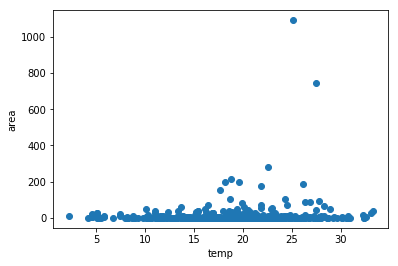

In [11]:
plt.scatter(forest_fires['temp'], forest_fires['area'])
plt.xlabel('temp')
plt.ylabel('area')
plt.show()

> We've used the pivot_table() method to create the area_by_y and area_by_x dataframes. Each dataframe contains the average area of the fires started at each X or Y position in forest_fires. By plotting this out, we'll be able to see which areas in the park are the most flammable.

Plotting the fires at each x or y position on a bar grapgh:

In [20]:
area_by_y = forest_fires.pivot_table(index="Y", values="area", aggfunc=np.mean)
area_by_x = forest_fires.pivot_table(index="X", values="area", aggfunc=np.mean)
area_by_x

,area
X,
1,13.392292
2,9.570548
3,2.456545
4,10.385165
5,3.045667
6,20.115000
7,11.092667
8,24.466885
9,18.546923


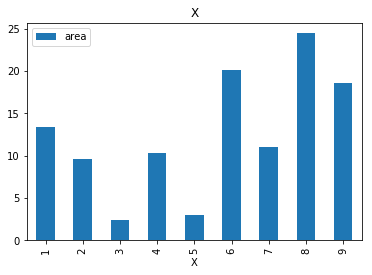

In [22]:
area_by_x.plot.bar(title="X");

In [25]:
area_by_y

,area
Y,
2,15.513409
3,9.110000
4,8.412857
5,15.758560
6,20.385946
8,185.760000
9,0.745000


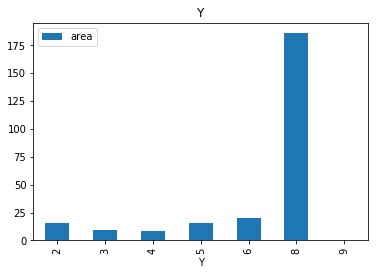

In [24]:
area_by_y.plot.bar(title="Y");

To make a horizontal bar chart, use [barh(0)](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh).

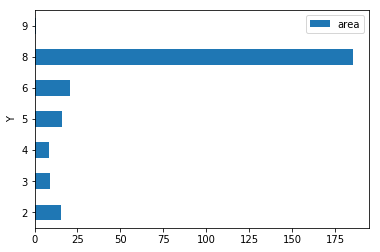

In [27]:
area_by_y.plot.barh();

In [28]:
area_by_month = forest_fires.pivot_table(index="month", values="area", aggfunc=np.mean)
area_by_day = forest_fires.pivot_table(index="day", values="area", aggfunc=np.mean)
print(area_by_month)
print(area_by_day)

            area
month           
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
          area
day           
fri   5.261647
mon   9.547703
sat  25.534048
sun  10.104526
thu  16.345902
tue  12.621719
wed  10.714815


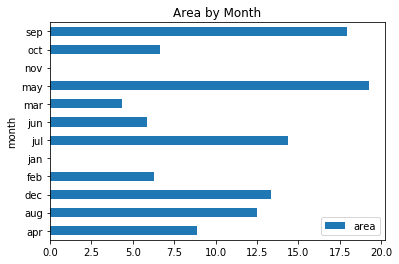

In [36]:
area_by_month.plot.barh(title="Area by Month");

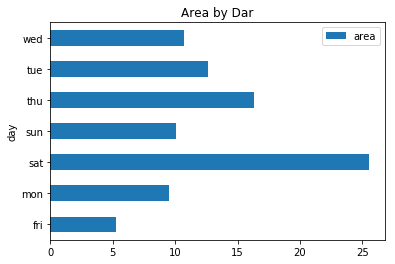

In [35]:
area_by_day.plot.barh(title="Area by Dar");

Make a scatter plot with the wind column of forest_fires on the x-axis and the area column of forest_fires on the y-axis.

Give the chart the title Wind speed vs fire area, the y-axis label Area consumed by fire, and the x-axis label Wind speed when fire started.

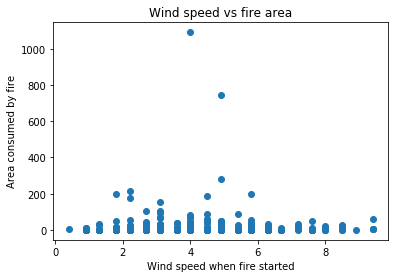

In [37]:
plt.scatter(forest_fires['wind'], forest_fires['area'])
plt.title('Wind speed vs fire area')
plt.xlabel('Wind speed when fire started')
plt.ylabel('Area consumed by fire')
plt.show()

the default matplotlib styles aren't great, so to change the global styles of plots, use [plt.style.use](http://matplotlib.org/users/style_sheets.html). Some decent built in styles are:

- fivethirtyeight -- the style of the plots on the site fivethirtyeight.com.
- ggplot -- the style of the popular R plotting library ggplot.
- dark_background -- will give the plot a darker background.
- bmh -- the style used in a popular online statistics book.

Make a scatter plot the rain column of forest_fires on the x-axis and the area column of forest_fires on the y-axis.

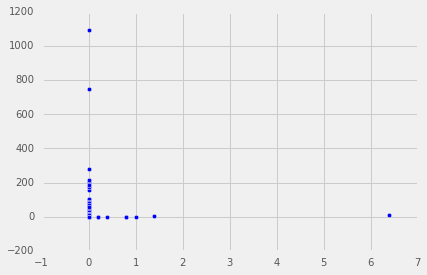

In [142]:
plt.style.use("fivethirtyeight")
plt.scatter(forest_fires['rain'], forest_fires['area'])
plt.show()

# using pandas with matplotlib to explore data

Using [recent grads](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv) dataset which has data from a survey on job outcomes for recent college graduates based on the major they studied in college.

In [150]:
import pandas as pd
recent_grads = pd.read_csv('data/recent-grads.csv')

print(recent_grads.columns)
print('data size:',recent_grads.shape)
recent_grads.head(3)

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')
data size: (173, 21)


,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


Historgrams can help to visulaize the distribution of values [.hist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas-dataframe-hist)

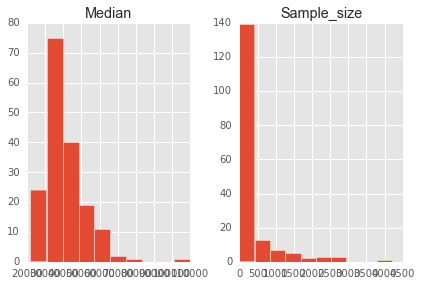

In [172]:
import matplotlib.pyplot as plt #pandas uses matplotlib to make the histograms

columns = ['Median','Sample_size']
recent_grads.hist(column=columns);

The above graph displays the histograms side by side, squishing the x axis too much.

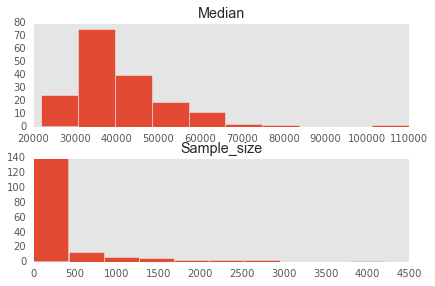

In [173]:
# Set the `layout` parameter as `(2,1)` so the graphs are displayed as 2 rows & 1 column 
# Then set `grid` parameter to `False`.
plt.style.use("ggplot")
recent_grads.hist(column=columns, layout=(2,1), grid=False);

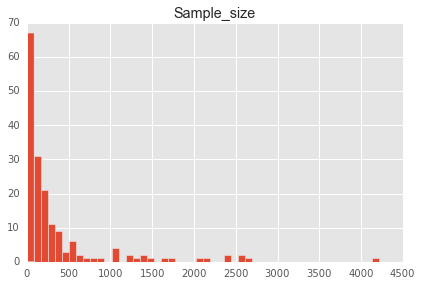

In [175]:
recent_grads.hist(column='Sample_size', bins=50);

## Box plots

> To get a better, high-level sense of how representative the Sample_size for the survey is to the Total number of students who graduated with the major, we'll plot these values to compare visually. Since the values for Sample_size and Total vary quite a bit per major, graphing all 173 majors to compare could make it difficult to compare majors effectively.

> Each major in the dataset is grouped into a category, represented as the value in Major_category for each row. We can utilize this column to make high-level comparisons across the dataset since comparing all 173 majors, even using graphs, would be quite difficult.

> Since we need to be able to easily compare ranges of values against each other, we'll use box plots, which enable us to visualize quartiles of values for a column broken down by Major_category. Box plots are similar to histograms in that the x-axis contain the bins or categories (in this case, the different Major_category values) and the y-axis represents information about values in that category. The difference, however, is that the y-axis doesn't contain a bar for each category but instead contain what's called a box and whisker diagram.

> Let's first generate a boxplot to get a visual idea of what one looks like and we'll walkthrough how they work afterwards.

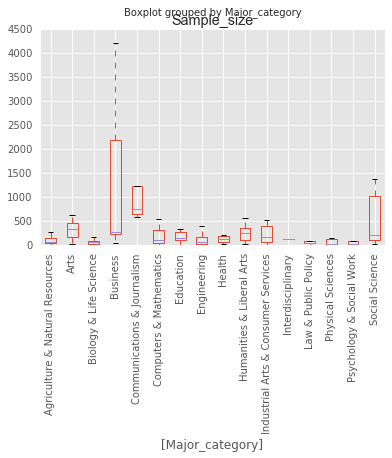

In [178]:
# Select just `Sample_size` & `Major_category` columns from `recent_grads` 
# Name the resulting DataFrame as `sample_size`
sample_size = recent_grads[['Sample_size', 'Major_category']]

# Run the `boxplot()` function on `sample_size` DataFrame and specify, as a parameter, 
# that we'd like a box and whisker diagram to be generated for each unique `Major_category`
sample_size.boxplot(by='Major_category')

# Format the resulting plot to make the x-axis labels (each `Major_category` value) 
# appear vertically instead of horiz;ontally (by rotating 90 degrees)
plt.xticks(rotation=90);

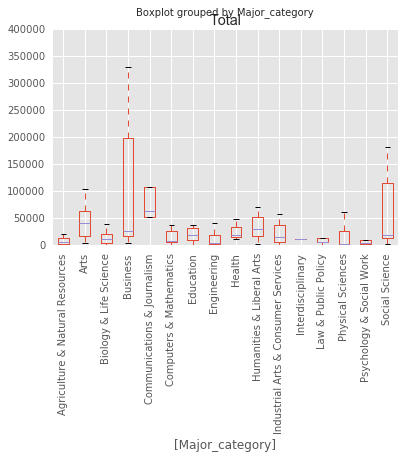

In [180]:
recent_grads[['Total', 'Major_category']].boxplot(by='Major_category')
plt.xticks(rotation=90);

## multiple plots on the same graph

> We now want to explore which variables could play a role in determining a graduate's Median salary in some way. Specifically, we'd like to get a high-level sense of which columns correlate more strongly with the Median salary than others.

> To accomplish this, we can actually generate multiple plots on the same chart and look for any indication of correlation. In the following code cell, we generate 2 scatter plots using the same y-axis but different x-axes and then use plt.show() afterwards to display the 2 plots on the same chart. We then use the color parameter to plot each scatter plot using a different color so we can easily see the difference.

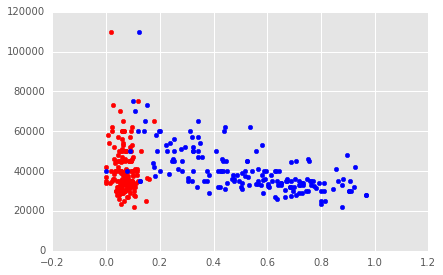

In [183]:
# Plot Unemployment_rate on x-axis, Median salary on y-axis, in red
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['Median'], color='red')
# Plot ShareWomen (Female % in major) on x-axis, Median salary on y-axis, in blue
plt.scatter(recent_grads['ShareWomen'], recent_grads['Median'], color='blue')
plt.show()

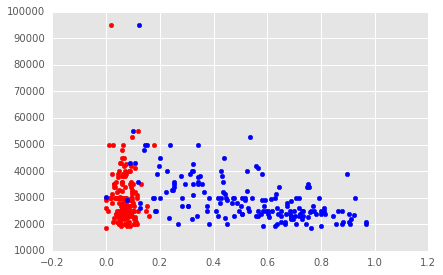

In [184]:
plt.scatter(recent_grads['Unemployment_rate'], recent_grads['P25th'], color='red')
plt.scatter(recent_grads['ShareWomen'], recent_grads['P25th'], color='blue',)
plt.show()

# Seaborn

a quick way to visualize a data set's distrubution is to use [distplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)


[ 0.70026886 -0.12249021  2.63421051 -2.17965933  2.64780354 -1.80944906
  0.42743389  0.48200531  0.98990298  0.74930127]


/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


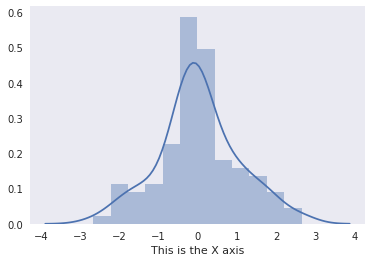

In [39]:
import seaborn as sns
sns.set(color_codes=True, style='dark')

# x is a list of random numbers
x = np.random.normal(size=100)
print(x[:10]) 
sns.distplot(x, axlabel='This is the X axis');

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


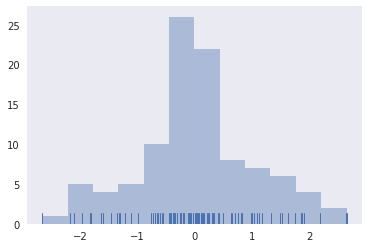

In [41]:
sns.set_style('dark')
sns.distplot(x, kde=False, rug=True);

In [42]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


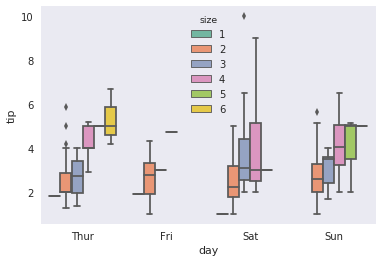

In [43]:
sns.boxplot(x='day', y='tip', hue='size', data=tips, palette='Set2');

# gender gap in undergrad degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [45]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


to plot two columns against each other, we can use pandas:

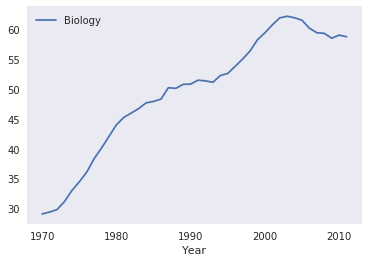

In [47]:
women_degrees.plot(x="Year", y="Biology");

or use matplotlib:

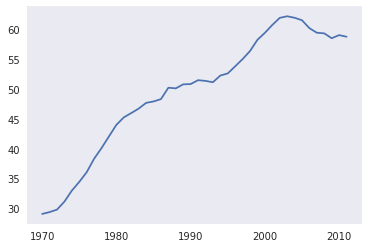

In [50]:
plt.plot(women_degrees['Year'], women_degrees['Biology']);

to take a look at how men and women degrees in biology changed over time:

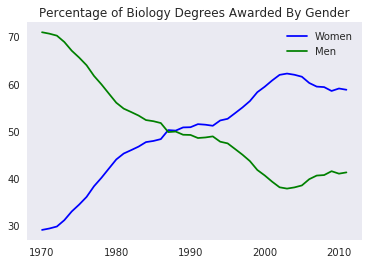

In [58]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender');

but say we wanted to customize this chart to our hearts content:

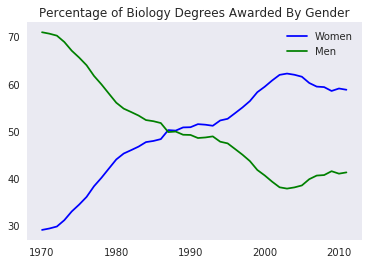

In [71]:
fig, ax = plt.subplots()

ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.legend(loc='upper right')

ax.tick_params(bottom=False, top=False, left=False, right=False)
for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.set_title('Percentage of Biology Degrees Awarded By Gender');

Lets look at multiple majors at a time:

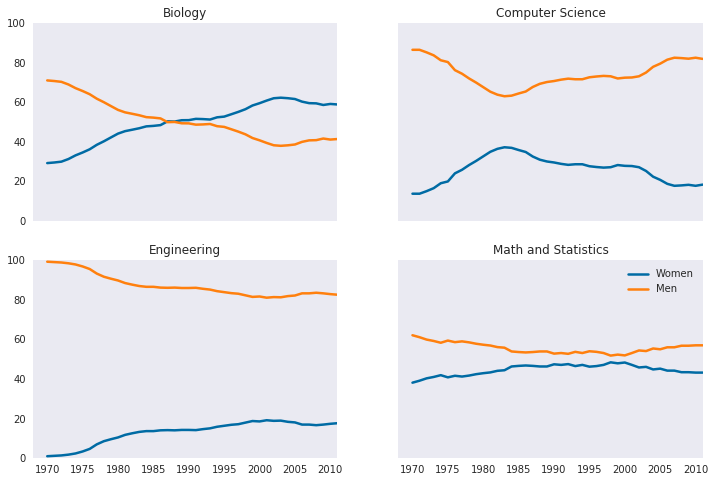

In [122]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(12,8))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

for ax, cat in zip(axes.flat, major_cats):
    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue,lw=2.5, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, lw=2.5, label='Men')
    ax.set_title(cat)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

plt.legend()
plt.show()

Looking at the gender differences in the STEM majors, this time in a row to make it easier to compare:

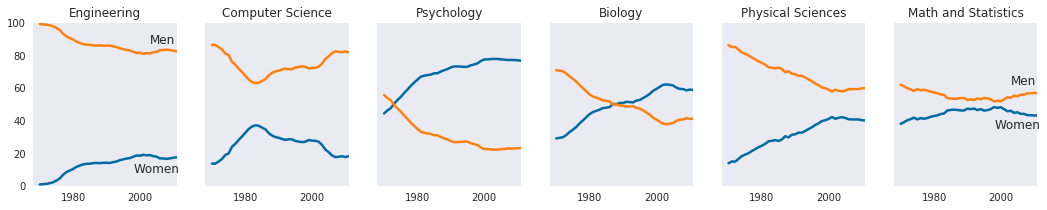

In [133]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig, axes = plt.subplots(1,6,figsize=(18,3), sharey=True)

for ax, cat in zip(axes, stem_cats):
    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue,lw=2.5, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, lw=2.5, label='Men')
    ax.set_title(cat)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
axes[0].text(2003,87,"Men")
axes[0].text(1998,8, "Women")

axes[-1].text(2003,62,"Men")
axes[-1].text(1998, 35, "Women");

To simplify making many similar plots, I'm putting the plotting code in a function:

In [153]:
def plot_cat(ax, cat):
    """takes in a ax and cat plots it"""
    cb_dark_blue = (0/255, 107/255, 164/255)
    cb_orange = (255/255, 128/255, 14/255)

    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue,lw=2.5, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, lw=2.5, label='Men')
    ax.set_title(cat)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.axhline(50, alpha=0.3)

so this makes it easier to read:

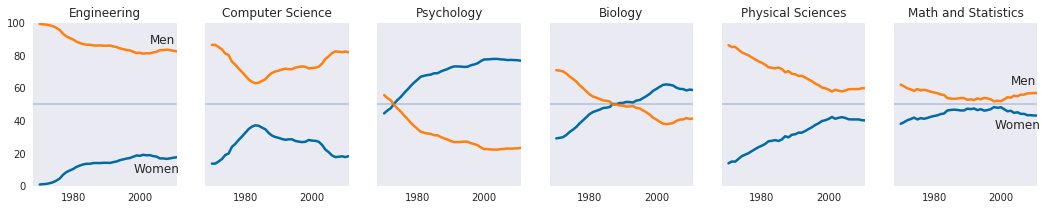

In [154]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig, axes = plt.subplots(1,6,figsize=(18,3), sharey=True)

for ax, cat in zip(axes, stem_cats):
    plot_cat(ax, cat)
    
axes[0].text(2003,87,"Men")
axes[0].text(1998,8, "Women")

axes[-1].text(2003,62,"Men")
axes[-1].text(1998, 35, "Women");

now to plot all the cats:

In [138]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

Text(2001,32,'Women')

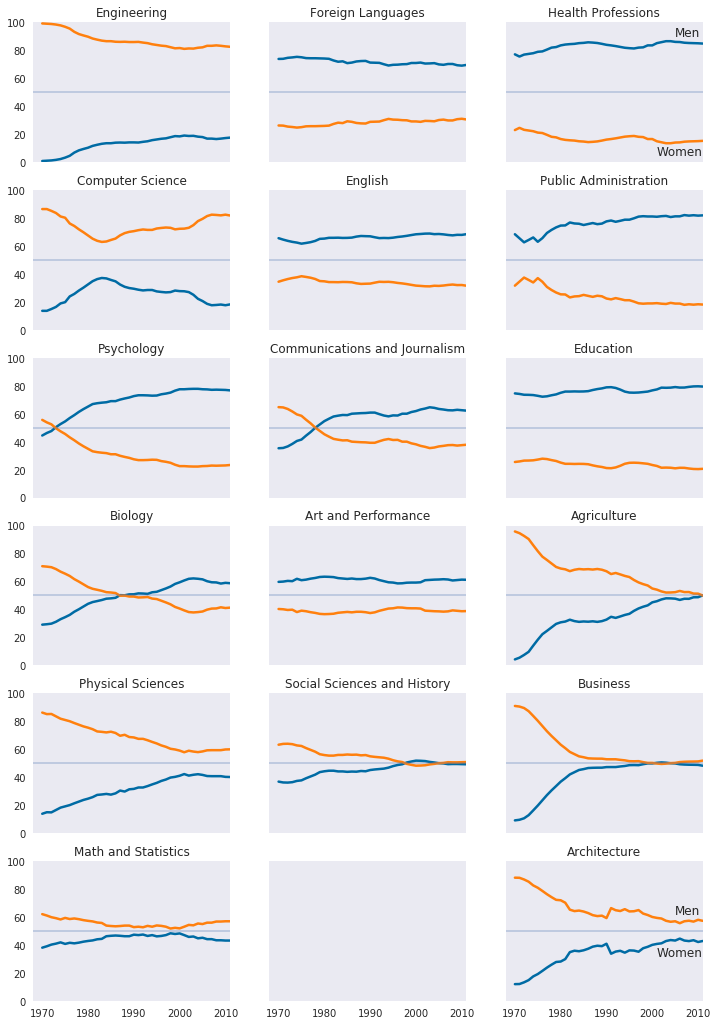

In [160]:
fig, axes = plt.subplots(6,3,figsize=(12,18), sharey=True, sharex=True)

for i, cat in enumerate(stem_cats):
    plot_cat(axes[i,0], cat)
    
for i, cat in enumerate(lib_arts_cats):
    plot_cat(axes[i,1], cat)

for i, cat in enumerate(other_cats):
    plot_cat(axes[i,2], cat)

# labelling the top right chart
axes[0,-1].text(2005,90,"Men")
axes[0,-1].text(2001, 5, "Women")

# labelling the bottom right chart
axes[-1,-1].text(2005,62,"Men")
axes[-1,-1].text(2001, 32, "Women")
#plt.savefig("test2.png") # to save the figure